# importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

loading data

In [19]:
boston_df = pd.read_csv('Boston.csv', index_col=0)
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [20]:
boston_df.rename({'medv':'Price'}, axis=1,inplace= True)

In [21]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


In [22]:
boston_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


check for missing values

In [23]:
boston_df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
Price      0
dtype: int64

# Exploratory Data Analysis
## Correlation

In [24]:
boston_df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,Price
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Text(0.5, 1.0, 'Crime Rate vs Price')

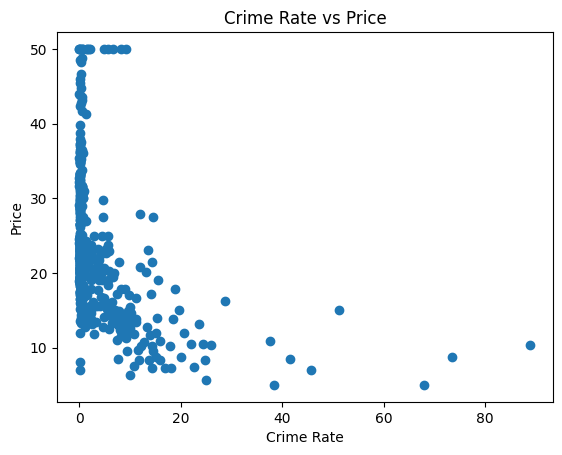

In [27]:

plt.scatter(boston_df['crim'],boston_df['Price'])
plt.xlabel('Crime Rate')
plt.ylabel('Price')
plt.title('Crime Rate vs Price')

Text(0.5, 1.0, 'rm vs Price')

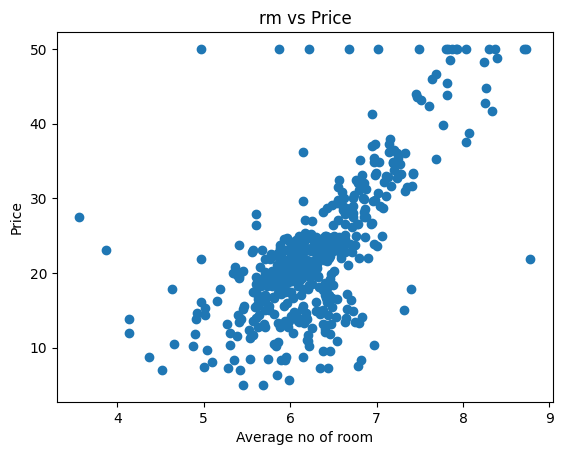

In [28]:

plt.scatter(boston_df['rm'],boston_df['Price'])
plt.xlabel('Average no of room')
plt.ylabel('Price')
plt.title('rm vs Price')

<Axes: xlabel='rm', ylabel='Price'>

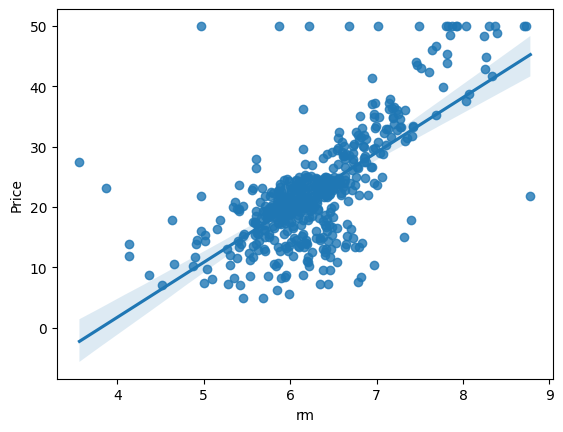

In [29]:
sns.regplot(x = 'rm', y='Price', data = boston_df)

As the average room is increasing the price is increasing

<Axes: xlabel='lstat', ylabel='Price'>

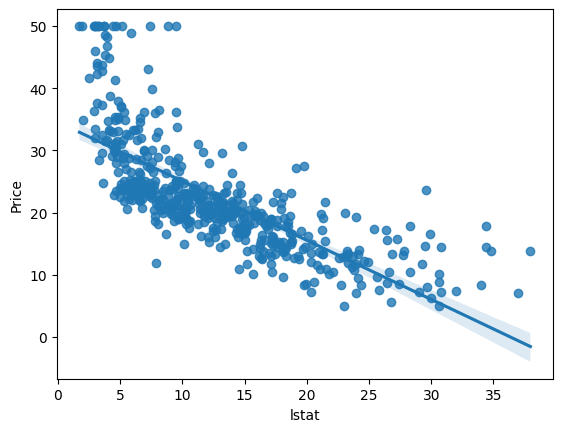

In [30]:
sns.regplot(x = 'lstat', y='Price', data = boston_df)

as the lstat is increasing the price is decreasing 

<Axes: xlabel='ptratio', ylabel='Price'>

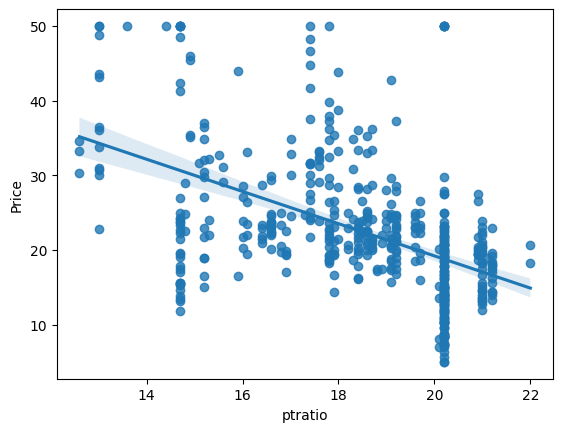

In [31]:
sns.regplot(x = 'ptratio', y='Price', data = boston_df)

In [32]:
## independent and dependent features

X = boston_df.iloc[:,:-1]
y = boston_df.iloc[:,-1]

In [54]:
y.shape

(506,)

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42)


In [59]:
print(f'{x_train.shape},{x_test.shape},{y_train.shape},{y_test.shape}')

(354, 13),(152, 13),(354,),(152,)


In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [61]:
x_train = scaler.fit_transform(x_train)

In [62]:
x_test = scaler.transform(x_test)

In [63]:
from sklearn.linear_model import LinearRegression
regression  = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [64]:
print(regression.coef_)

[-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]


In [65]:
print(regression.intercept_)

23.01581920903955


In [66]:
## on which parameters the models has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [68]:
## Prediction with test data

reg_pred = regression.predict(x_test)

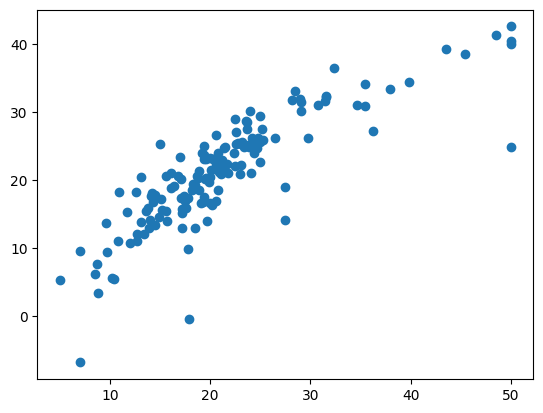

In [70]:
plt.scatter(y_test,reg_pred)

In [71]:
residual = y_test - reg_pred

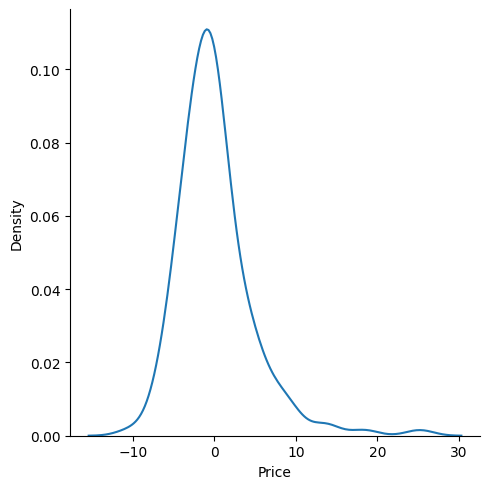

In [72]:
# ploting residual

sns.displot(residual,kind='kde')

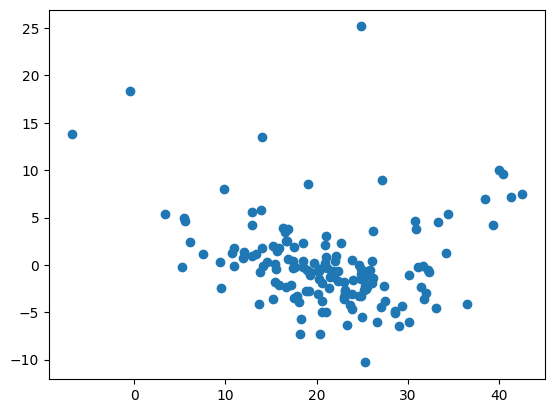

In [73]:
## scatter plot with respect to prediction and residuals
## it needs to be uniform distribution
plt.scatter(reg_pred,residual)

In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

3.1627098714574053
21.517444231177205
4.6386899261728205


In [ ]:
# R square and adjusted R square
